<h1><center>Intro to Statistics</center></h1>

<h3><center>1. Intro to Statistics, Measures of Central Tendency, Measures of Spread</center></h3>
<center>Author: Tristan Sim Kuan Xue</center>

## What is Statistics?

Statistics is defined as the discipline that concerns the collection, organization, analysis, interpretation, and presentation of data.  <i>(Wikipedia)</i>

Statistics can be majorly categorized into 2: 
- Descriptive Statistics
- Inferential Statistics

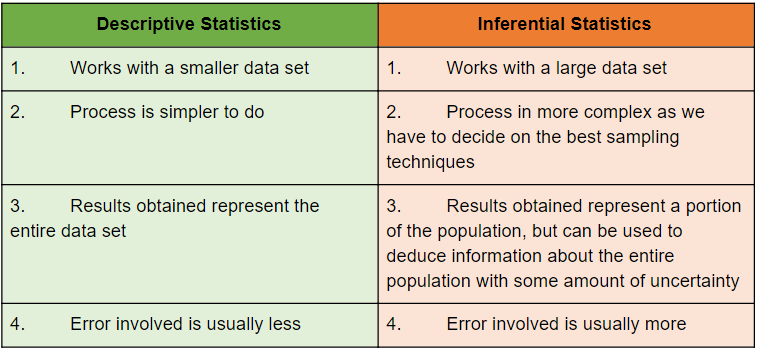

In this notebook, we will be going through both descriptive and inferential statistics, including measures of center, distributions and correlations.

## About the Dataset

The dataset used in this notebook is the <a href="https://www.kaggle.com/datasets/mauryansshivam/spotify-revenue-expenses-and-its-premium-users">Spotify Revenue, Expenses and Its Premium Users</a> dataset. This dataset contains the listed spotify revenue, expenses and its premium users since 2017

### Metadata

- MAUs : It is defined as the total count of Ad-Supported Users and Premium Subscribers that have consumed content for greater than zero milliseconds in the last thirty days from the period-end indicated.

- Premium MAUs : It is defined as users that have completed registration with Spotify and have activated a payment method for Premium Service.

- Ad MAUs : It is defined as the total count of Ad-Supported Users that have consumed content for greater than zero milliseconds in the last thirty days from the period-end indicated.

- Premium ARPU : It is average revenue per user which is monthly measure defined as Premium subscription revenue recognized in the quarter indicated divided by the average daily Premium Subscribers in such quarter, which is then divided by three months.

- Cost of Revenue : It is expenses done by company.


## Setup

In [2]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Spotify Quarterly.csv")

data.head()

,Date,Total Revenue,Cost of Revenue,Gross Profit,Premium Revenue,Premium Cost Revenue,Premium Gross Profit,Ad Revenue,Ad Cost of revenue,Ad gross Profit,MAUs,Premium MAUs,Ad MAUs,Premium ARPU,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost
0,31-03-2023,3042.0,2276.0,776.0,2713.0,1937.0,776.0,329.0,339.0,-10.0,515.0,210.0,317.0,4.32,347.0,435.0,140.0
1,31-12-2022,3166.0,2365.0,801.0,2717.0,1939.0,778.0,449.0,426.0,23.0,489.0,205.0,295.0,4.55,453.0,415.0,164.0
2,30-09-2022,3036.0,2286.0,750.0,2651.0,1908.0,743.0,385.0,378.0,7.0,456.0,195.0,273.0,4.63,432.0,386.0,160.0
3,30-06-2022,2864.0,2160.0,704.0,2504.0,1804.0,700.0,360.0,356.0,4.0,433.0,188.0,265.0,4.54,391.0,336.0,171.0
4,31-03-2022,2661.0,1990.0,671.0,2379.0,1704.0,675.0,282.0,286.0,-4.0,422.0,182.0,252.0,4.38,296.0,250.0,131.0


In [4]:
data = data.dropna()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           25 non-null     object 
 1   Total Revenue                  25 non-null     float64
 2   Cost of Revenue                25 non-null     float64
 3   Gross Profit                   25 non-null     float64
 4   Premium Revenue                25 non-null     float64
 5   Premium Cost Revenue           25 non-null     float64
 6   Premium Gross Profit           25 non-null     float64
 7   Ad Revenue                     25 non-null     float64
 8   Ad Cost of revenue             25 non-null     float64
 9   Ad gross Profit                25 non-null     float64
 10  MAUs                           25 non-null     float64
 11  Premium MAUs                   25 non-null     float64
 12  Ad MAUs                        25 non-null     float

## Measures of Central Tendency

Measures of Central Tendency,  are statistical values that provide information about the central values of a dataset. They are used to summarize and describe the distribution of data.

### Mean

The mean is the arithmetic average of a set of values. It is calculated by summing all the values in the dataset and dividing the sum by the total number of values. It is denoted by this formula:

<h1><center> $
\bar{x} = \frac{{\sum_{i=1}^{n} x_i}}{{n}}
$ </center></h1>

where:
- $\bar{x}$ represents the mean,
- $x_i$ represents each individual value in the dataset, and
- $n$ represents the total number of values in the dataset.


In [13]:
# Getting the mean of Total Revenue by dividing sum / count

tr_sum = data['Total Revenue'].sum()
tr_count = data['Total Revenue'].count()

print("Total Revenue mean: ", tr_sum / tr_count)

Total Revenue mean:  1949.2


In [12]:
# Alternatively, using pandas
tr_mean = data["Total Revenue"].mean()

print("Total Revenue mean: ", tr_mean)

Total Revenue mean:  1949.2


### Median

The median represents the middle value of a dataset. It is a way to find the "middle" value that divides the data into two equal halves. It is also known as the 50th percentile.


The formula for the median varies whether the dataset has an odd or even number of values:

<br>

- If $\mathrm{n}$ is odd, it is denoted by this formula:

<h1><center>$
\mathrm{Med}(x) = \frac{(n+1)}{2}
$</center></h1>

- If $\mathrm{n}$ is even, it is denoted by this formula:

<h1><center>$
\mathrm{Med}(x) =  \frac{(n / 2) + [(n / 2) + 1]} {2}
$</center></h1>

In [51]:
# Getting the Median of Ad Revenue

# 1. Identify if Ad Revenue has even or odd number of data points
data['Ad Revenue'].count()

# 2. Since it has an odd number of data points, the formula for median is (n+1)/2
# (We have to sort the column and reset the index in order to index the correct value)
# (Moreover, we have to subtract one due to 0 indexes)
median_ar = data['Ad Revenue'].sort_values().reset_index(drop=True)[(data['Ad Revenue'].count() + 1) / 2 - 1]
print("Ad Revenue median: ", median_ar)

Ad Revenue median:  175.0


In [52]:
# Alternatively, using pandas
data['Ad Revenue'].median()

175.0

### Mode

## References

- <a href="https://www.datadriveninvestor.com/2019/02/28/descriptive-vs-inferential-statistics-whats-the-difference/">Descriptive VS Inferential Statistics</a>